1.数据的特征有很多，并且数据特征的名称缺乏一定的实际意义，所以根据标准差删除一些特征
2.pca降维需要stand，tsvd不需要，tsvd适用于稀疏的数据（如何衡量稀疏？）


In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = '/Users/xuweikang/Desktop/data/kaggle/Santander Value Prediction Challenge/'

In [3]:
data = pd.read_csv(path + 'train.csv')

In [4]:
data.headad(3)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [7]:
data.columns

Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4993)

In [8]:
data.shapepe

(4459, 4993)

In [11]:
data.isnull().sum().any()

False

In [12]:
target = data['target']

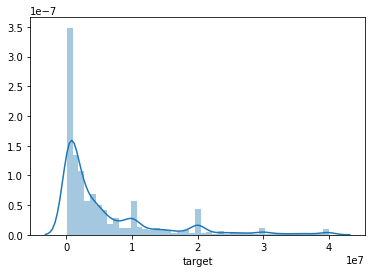

In [13]:
sns.distplot(target)

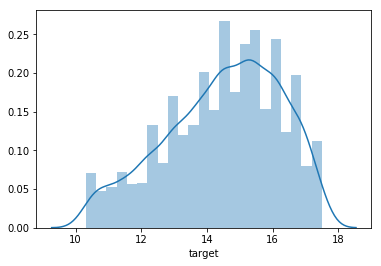

In [14]:
sns.distplot(np.log1p(target))

In [15]:
target.describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

In [16]:
np.log1p(target).describe()

count    4459.000000
mean       14.490239
std         1.750947
min        10.308986
25%        13.304687
50%        14.630876
75%        15.894952
max        17.504390
Name: target, dtype: float64

In [26]:
X = data.drop(['ID','target'], axis=1)
drop_std_zero = []
for c in X.columns:
    if X[c].std() == 0:
        drop_std_zero.append(c)

In [27]:
drop_std_zero

['d5308d8bc',
 'c330f1a67',
 'eeac16933',
 '7df8788e8',
 '5b91580ee',
 '6f29fbbc7',
 '46dafc868',
 'ae41a98b6',
 'f416800e9',
 '6d07828ca',
 '7ac332a1d',
 '70ee7950a',
 '833b35a7c',
 '2f9969eab',
 '8b1372217',
 '68322788b',
 '2288ac1a6',
 'dc7f76962',
 '467044c26',
 '39ebfbfd9',
 '9a5ff8c23',
 'f6fac27c8',
 '664e2800e',
 'ae28689a2',
 'd87dcac58',
 '4065efbb6',
 'f944d9d43',
 'c2c4491d5',
 'a4346e2e2',
 '1af366d4f',
 'cfff5b7c8',
 'da215e99e',
 '5acd26139',
 '9be9c6cef',
 '1210d0271',
 '21b0a54cb',
 'da35e792b',
 '754c502dd',
 '0b346adbd',
 '0f196b049',
 'b603ed95d',
 '2a50e001c',
 '1e81432e7',
 '10350ea43',
 '3c7c7e24c',
 '7585fce2a',
 '64d036163',
 'f25d9935c',
 'd98484125',
 '95c85e227',
 '9a5273600',
 '746cdb817',
 '6377a6293',
 '7d944fb0c',
 '87eb21c50',
 '5ea313a8c',
 '0987a65a1',
 '2fb7c2443',
 'f5dde409b',
 '1ae50d4c3',
 '2b21cd7d8',
 '0db8a9272',
 '804d8b55b',
 '76f135fa6',
 '7d7182143',
 'f88e61ae6',
 '378ed28e0',
 'ca4ba131e',
 '1352ddae5',
 '2b601ad67',
 '6e42ff7c7',
 '2219